# Preparación de los Datos

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
data = pd.read_csv('../datasets/twitter_gender_data.csv', low_memory = False)

### Convertir a DataFrame

In [49]:
df = pd.DataFrame(data)

In [50]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df.iloc[;-3]

SyntaxError: invalid syntax (<ipython-input-73-db38aea7ebb0>, line 1)

### Renombrar las columnas

In [51]:
df = df.rename(columns={
    "Followers": "followers",
    "Follower_Change": "follower_change",
    "Num_Tweets": "tweets",
    "Year": "year",
    "Month": "month",
    "Week": "week",
    "Day": "day",
    "Hour": "hour"
})

### Verificar si existen filas con valores nulos

In [52]:
df_not_null = df[df != 0]

In [53]:
pd.isnull(df_not_null).sum()

_unit_id                     0
_golden                  20000
_unit_state                  0
_trusted_judgments           0
_last_judgment_at           50
gender                      97
gender:confidence           97
profile_yn                   0
profile_yn:confidence        0
created                      0
description               3746
fav_number                   3
gender_gold              19884
link_color                  80
name                        21
profile_yn_gold          19889
profileimage                83
retweet_count               24
sidebar_color                4
text                         8
tweet_coord              19306
tweet_count                476
tweet_created               99
tweet_id                    17
tweet_location            7334
user_timezone             7731
Unnamed: 26              19606
Unnamed: 27              19963
Unnamed: 28              20026
Unnamed: 29              20032
Unnamed: 30              20038
Unnamed: 31              20044
Unnamed:

In [72]:
df_not_null['']

_unit_id                   int64
_golden                  float64
_unit_state               object
_trusted_judgments         int64
_last_judgment_at         object
gender                    object
gender:confidence        float64
profile_yn                object
profile_yn:confidence    float64
created                   object
description               object
fav_number                object
gender_gold               object
link_color                object
name                      object
profile_yn_gold           object
profileimage              object
retweet_count             object
sidebar_color             object
text                      object
tweet_coord               object
tweet_count               object
tweet_created             object
tweet_id                  object
tweet_location            object
user_timezone             object
Unnamed: 26               object
Unnamed: 27               object
Unnamed: 28               object
Unnamed: 29               object
Unnamed: 3

### Resumen estadístico

- count: Número de elementos no nulos
- mean: Promedio
- std: Desviación estándar
- min: Valor mínimo
- 25%: Primer cuartil
- 50%: Segundo cuartil
- 75%: Tercer cuartil
- max: Valor máximo

In [54]:
df_statistics = df_not_null.describe()

In [55]:
df_statistics

,_unit_id,_golden,_trusted_judgments,gender:confidence,profile_yn:confidence
count,2.005000e+04,50.0,20050.000000,19953.000000,20050.000000
mean,8.157294e+08,1.0,3.615711,0.885897,0.993221
std,6.000801e+03,0.0,12.331890,0.184344,0.047168
min,8.157192e+08,1.0,3.000000,0.314000,0.627200
25%,8.157243e+08,1.0,3.000000,0.678300,1.000000
50%,8.157294e+08,1.0,3.000000,1.000000,1.000000
75%,8.157345e+08,1.0,3.000000,1.000000,1.000000
max,8.157580e+08,1.0,274.000000,1.000000,1.000000


### Diagrama de Caja de Bigotes #1 (Con datos atípicos y con valores nulos)

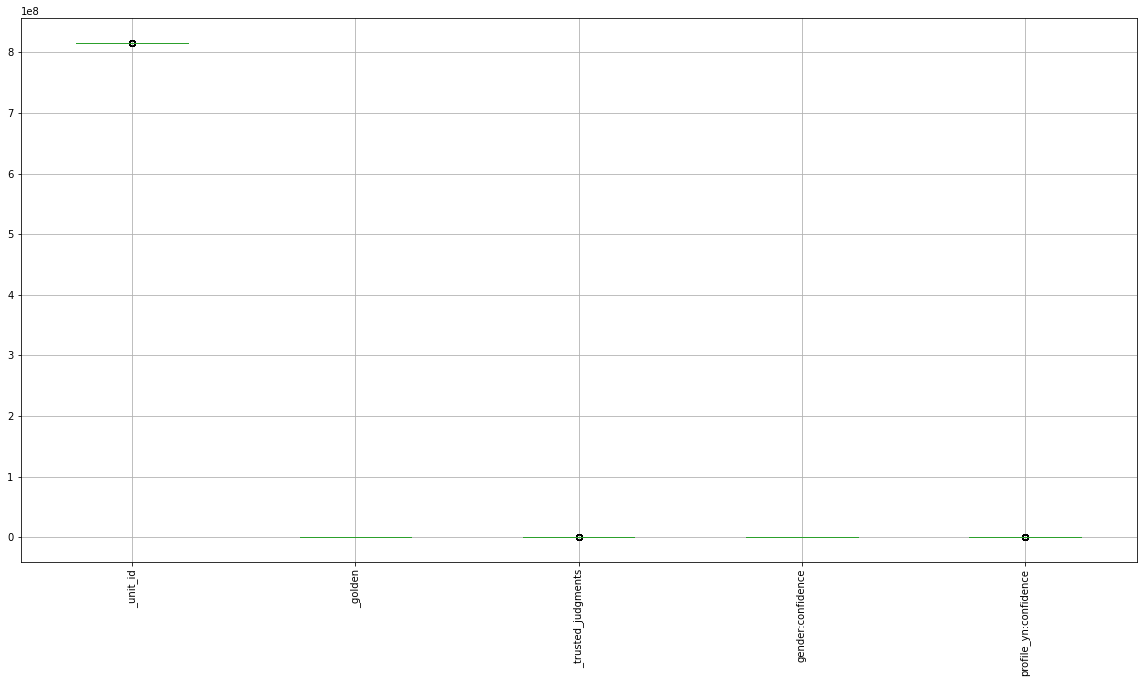

In [56]:
box_plot_1 = df_not_null.boxplot(rot=90, figsize=(20,10))

### Valores Atípicos

- IQR = Q3 - Q1
- q < Q1 - 1.5 * IQR
- q > Q3 + 1.5 * IQR

In [57]:
array_not_null = df_not_null.to_numpy()
array_statistics = df_statistics.to_numpy()

In [58]:
size_array_not_null = array_not_null.shape

In [59]:
rows = size_array_not_null[0]
columns = size_array_not_null[1]

In [61]:
for i in range(columns - 1):
    for j in range(rows):
        q1 = array_statistics[4][i]
        q3 = array_statistics[6][i]
        iqr = q3 - q1
        left_most = q1 - (1.5 * iqr)
        right_most = q3 + (1.5 * iqr)
        if(array_not_null[j][i + 1] < left_most):
            array_not_null[j][i + 1] = array_statistics[1][i]
        if(array_not_null[j][i + 1] > right_most):
            array_not_null[j][i + 1] = array_statistics[1][i]

TypeError: '>' not supported between instances of 'numpy.ndarray' and 'str'

In [62]:
names_cols = df_not_null.columns.values
data_without_outliers = pd.DataFrame.from_records(array_not_null, columns = names_cols)
df_mean = data_without_outliers.describe()

In [63]:
df_mean

,_unit_id,_golden,_trusted_judgments,gender:confidence,profile_yn:confidence
count,2.005000e+04,5.000000e+01,20050.000000,19953.000000,20050.000000
mean,8.157294e+08,8.157294e+08,3.615711,0.885897,0.993221
std,6.000801e+03,0.000000e+00,12.331890,0.184344,0.047168
min,8.157192e+08,8.157294e+08,3.000000,0.314000,0.627200
25%,8.157243e+08,8.157294e+08,3.000000,0.678300,1.000000
50%,8.157294e+08,8.157294e+08,3.000000,1.000000,1.000000
75%,8.157345e+08,8.157294e+08,3.000000,1.000000,1.000000
max,8.157580e+08,8.157294e+08,274.000000,1.000000,1.000000


### Diagrama de Caja de Bigotes #2 (Sin datos atípicos y con valores nulos)

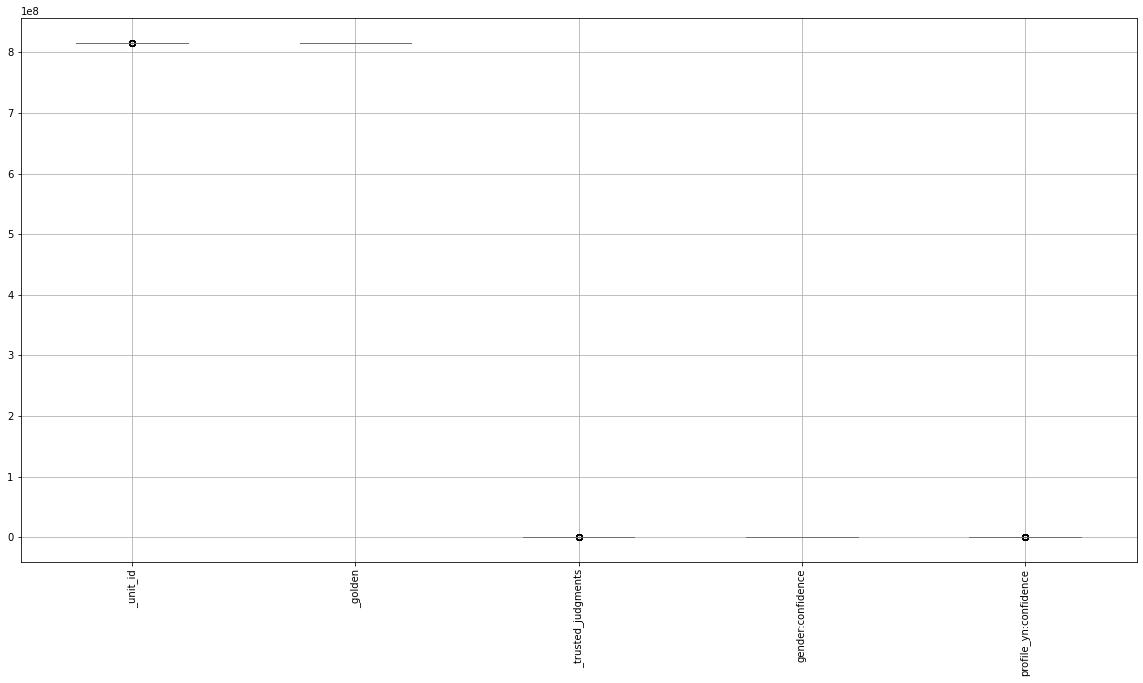

In [64]:
box_plot_2 = data_without_outliers.boxplot(rot=90, figsize=(20,10))

### Valores Nulos

In [65]:
data = data_without_outliers
array_data = data.to_numpy()
array_mean = df_mean.to_numpy()

In [66]:
size_array_data = array_data.shape

In [67]:
rows_2 = size_array_data[0]
columns_2 = size_array_data[1]

In [68]:
for i in range(columns_2 - 1):
    for j in range(rows_2):
        if(np.math.isnan(array_data[j][i + 1])):
            array_data[j][i+1] = array_mean[1][i]

TypeError: must be real number, not str

In [69]:
names_cols_2 = data_without_outliers.columns.values
data_next = pd.DataFrame.from_records(array_data, columns = names_cols_2)
df_nulls = data_next.describe()

In [70]:
df_nulls

,_unit_id,_golden,_trusted_judgments,gender:confidence,profile_yn:confidence
count,2.005000e+04,2.005000e+04,20050.000000,19953.000000,20050.000000
mean,8.157294e+08,8.157294e+08,3.615711,0.885897,0.993221
std,6.000801e+03,1.192123e-07,12.331890,0.184344,0.047168
min,8.157192e+08,8.157294e+08,3.000000,0.314000,0.627200
25%,8.157243e+08,8.157294e+08,3.000000,0.678300,1.000000
50%,8.157294e+08,8.157294e+08,3.000000,1.000000,1.000000
75%,8.157345e+08,8.157294e+08,3.000000,1.000000,1.000000
max,8.157580e+08,8.157294e+08,274.000000,1.000000,1.000000


### Diagrama de Caja de Bigotes #3 (Sin datos atípicos y sin valores nulos)

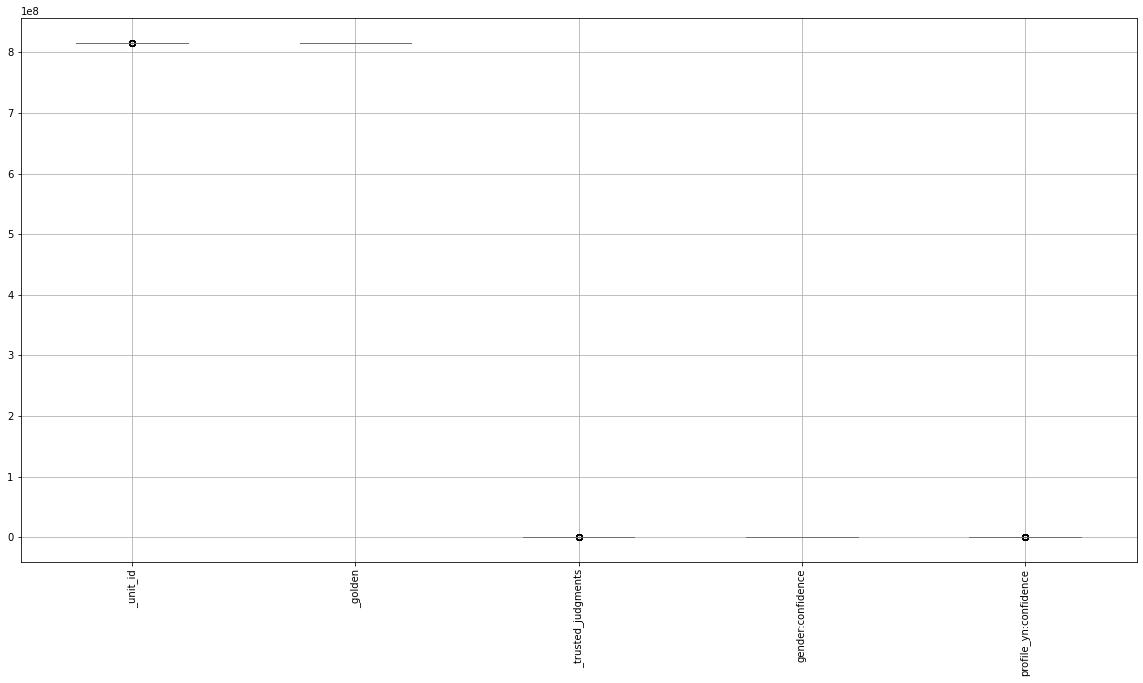

In [71]:
box_plot_3 = data_next.boxplot(rot=90, figsize=(20,10))

### PCA (Análisis de Componentes Principales)